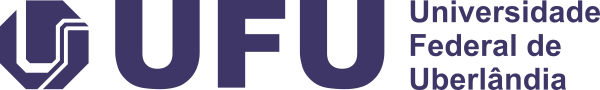

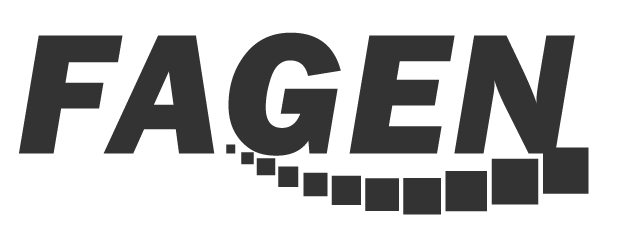

# **An√°lise Fatorial Explorat√≥ria - Python**

## Prof. Dr. Jos√© Eduardo Ferreira Lopes

### Introdu√ß√£o

Objetiva-se com este notebook apresentar o processo de <b>An√°lise Fatorial Explorat√≥ria - AFE </b> em Python, destacando os princpais pontos relacionados ao assunto.


### Pontos de Aprendizagem:

> -  Circunst√¢ncias a partir das quais uma an√°lise fatorial pode ser aplicada;<br>
>
> -  <b>Premissas</b> subjacentes √† utiliza√ß√£o da an√°lise fatorial;<br>
>
> - Diferenciar a an√°lise fatorial das outras t√©cnicas multivariadas;<br>
>
> - O porque e os principais <b>m√©todos rotacionais</b>;<br>
>
> - <b>N√∫mero de fatores</b> a serem extra√≠dos e poss√≠veis nomes;<br>
>
> - Conceitos de <b>cargas fatorias</b> e <b>escores fatoriais</b>;<br>
>
> - Conceitos de <b>eigenvalues</b> (autovalores) e <b>comunalidade</b>;<br>
>
> - Saber estratificar observa√ß√µes a partir de escores fatoriais.<br>


### Defini√ß√µes e Conceitos:

An√°lise Fatorial √© um nome gen√©rico dado a uma classe de m√©todos estat√≠sticos multivariados cujo prop√≥sito principal √© definir a estrutura subjacente em uma matriz de dados. Assim, t√™m-se os seguintes pontos:<br>
> - Abordar o problema de analisar a estrutura das inter-rela√ß√µes (correla√ß√µes) entre um grande n√∫mero de vari√°veis, definindo um conjunto de dimens√µes latentes comuns, chamadas de fatores;<br>
> - Identificar as dimens√µes separadas da estrutura e ent√£o determinar o grau em que cada vari√°vel √© explicada por cada dimens√£o;
Resumir e reduzir os dados em dimens√µes latentes interpret√°veis e compreens√≠veis usando escores para cada dimens√£o e, consequentemente, substituir as vari√°veis originais.<br>
> - Os modelos de an√°lise fatorial buscam explicar o comportamento das vari√°veis observadas em rela√ß√£o ao comportamento de um conjunto de vari√°veis n√£o observadas (vari√°veis latentes ou fatores).




### Fonte de pesquisa - Introdu√ß√£o √† An√°lise Fatorial em Python

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

### Bibliotecas utilizadas

<p>As principais bibliotecas utilizadas s√£o:<br>
<a href="https://pandas.pydata.org/">Pandas</a>;<br>
<a href="https://matplotlib.org/">Matplotlib</a>;<br>  
<a href="https://factor-analyzer.readthedocs.io/en/latest/index.html">factor_analyzer</a>;<br>
<a href="https://docs.scipy.org/doc/scipy/reference/tutorial/index.html">scipy</a><br>
</p>


In [375]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
from scipy import stats as st
import researchpy as rs
from factor_analyzer import FactorAnalyzer as fa
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity as bartlett
from factor_analyzer.factor_analyzer import calculate_kmo as kmo
from scipy.stats import shapiro

pd.set_option("display.max_columns", 101)

In [376]:
#!pip install researchpy

In [377]:
#!pip install factor_analyzer

### Dados

Os dados aqui utilizados acompnham o livro-texto do Hair jr. HAIR JR., J. F. et al. <b>An√°lise Multivariada de Dados</b>. 6. ed. Bookman: Porto Alegre, 2009. O arquivo de dados se chama HBAT e cont√©m informa√ß√µes a respeito de pesquisa respondida pelos clientes, avaliando atributos/caracter√≠sticas da empres HBAT.<br>

<pre>
ID - Identificador do Cliente              X1 - Longevidade do Cliente
X2 - Tipo de Ind√∫stria                     X3 - Tamanho da Empresa
X4 - Regi√£o                                X5 - Sistema de Distribui√ß√£o
X6 - Qualidade do Produto                  X7 - Atividades de E-Comerce
X8 - Suporte T√©cnico                       X9 - Resolu√ß√£o de Reclama√ß√µes
X10 - Propaganda                           X11 - Linha de Produtos
X12 - Imagem da For√ßa de Vendas            X13 - Pre√ßos Competitivos
X14 - Garantias                            X15 - Novos Produtos
X16 - Pedidos e Faturamento                X17 - Flexibilidade de Pre√ßos
X18 - Velocidade de Entrega                X19 - Satisfa√ß√£o
X20 - Recomendaria                         X21 - Recompraria
X22 - N√≠vel de Compra                      X23 - Consideraria Alian√ßa Estrat√©gica
</pre>

Da vari√°vel X6 At√© a vari√°vel X18, representam a nota que cada um dos clientes pesquisados atribu√≠ram para os respectivos atributos. Notas entre 0 e 10.

<p>Leitura / Carga da planilha de Clientes do Excel: 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html#pandas.read_excel/">read_excel</a>
</p>

In [380]:
df = pd.read_excel("HBAT.xlsx", sheet_name = "HBAT")

<p>Visualiza√ß√£o de n primeiras linhas do arquivo (head): 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head()</a><br>
</p>

Por *_default_*, s√£o apresenadas as cinco primeiras linhas. Ao passar o par√¢metro, ser√£o exibidas as n primieras linhas.

In [383]:
df.head(3)

id                x1                    x2                  x3  \
0   1  Entre 1 e 5 Anos  Ind√∫stria de Revista       Grande (500+)   
1   2   Acima de 5 Anos   Ind√∫stria de Jornal  Pequena (0 to 499)   
2   3   Acima de 5 Anos  Ind√∫stria de Revista       Grande (500+)   

                         x4        x5   x6   x7   x8   x9  x10  x11  x12  x13  \
0  Fora da Am√©rica do Norte    Direto  8.5  3.9  2.5  5.9  4.8  4.9  6.0  6.8   
1      USA/Am√©rica do Norte  Indireto  8.2  2.7  5.1  7.2  3.4  7.9  3.1  5.3   
2  Fora da Am√©rica do Norte    Direto  9.2  3.4  5.6  5.6  5.4  7.4  5.8  4.5   

   x14  x15  x16  x17  x18  x19  x20  x21   x22  x23  
0  4.7  4.3  5.0  5.1  3.7  8.2  8.0  8.4  65.1  Sim  
1  5.5  4.0  3.9  4.3  4.9  5.7  6.5  7.5  67.1  N√£o  
2  6.2  4.6  5.4  4.0  4.5  8.9  8.4  9.0  72.1  Sim

<p>Resumo do arquivo (info): 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html">info()</a><br>
Valores e Tipo de Dados
</p>

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      100 non-null    int64  
 1   x1      100 non-null    object 
 2   x2      100 non-null    object 
 3   x3      100 non-null    object 
 4   x4      100 non-null    object 
 5   x5      100 non-null    object 
 6   x6      100 non-null    float64
 7   x7      100 non-null    float64
 8   x8      100 non-null    float64
 9   x9      100 non-null    float64
 10  x10     100 non-null    float64
 11  x11     100 non-null    float64
 12  x12     100 non-null    float64
 13  x13     100 non-null    float64
 14  x14     100 non-null    float64
 15  x15     100 non-null    float64
 16  x16     100 non-null    float64
 17  x17     100 non-null    float64
 18  x18     100 non-null    float64
 19  x19     100 non-null    float64
 20  x20     100 non-null    float64
 21  x21     100 non-null    float64
 22  x22

### An√°lise

Observar que a vari√°vel X6 √© do tipo **object**, enquanto o esperado seria **float64**

Verificar os valores da vari√°vel.

In [388]:
df["x6"].value_counts()

x6
8.7     6
9.3     6
6.4     5
9.9     5
6.7     4
9.1     4
5.7     4
8.5     4
8.0     3
8.6     3
7.6     3
8.2     3
6.9     3
9.4     3
9.2     3
7.7     3
7.4     2
7.9     2
10.0    2
9.6     2
5.9     2
5.5     2
7.5     2
6.1     2
7.1     2
6.5     2
9.0     2
8.8     1
8.4     1
5.0     1
6.6     1
6.0     1
5.1     1
8.3     1
8.1     1
7.0     1
5.2     1
5.6     1
6.3     1
9.5     1
5.8     1
6.2     1
7.8     1
Name: count, dtype: int64

Observar que existe um valor do tipo *string* enquanto o esperado √© *float*. Este valor pode ser substitu√≠do por **10**, dado que a escala de coleta de dados vari√°va entre 1 e 10, sendo que 10 correspondia √† nota **Excelente**


Substituir o valor encntrado **Excelente** por 10 e alterar o tipo de dado.

In [391]:
df["x6"] = df["x6"].replace('Excelente', '10')

In [392]:
df["x6"] = df["x6"].astype("float64")

## Explora√ß√£o dos Dados

### Estat√≠stica Descritiva

<p> Fun√ß√£o Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html">describe()</a> <br>
</p>

A fun√ß√£o describe() gera as estat√≠sticas descritivas que sumarizam a tend√™ncia central, dispers√£o e forma de distribui√ß√£o de um conjunto de dados. <br>
Por padr√£o, as estat√≠sticas geradas s√£o para vari√°veis m√©tricas. com o par√¢metro <b>include='all'</b>, s√£o geradas as estat√≠sticas para todos os tipos de vari√°veis.



In [395]:
df.describe().round(2)

id      x6      x7      x8      x9     x10     x11     x12     x13  \
count  100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00   
mean    50.50    7.81    3.67    5.36    5.44    4.01    5.80    5.12    6.97   
std     29.01    1.40    0.70    1.53    1.21    1.13    1.32    1.07    1.55   
min      1.00    5.00    2.20    1.30    2.60    1.90    2.30    2.90    3.70   
25%     25.75    6.57    3.28    4.25    4.60    3.18    4.70    4.50    5.88   
50%     50.50    8.00    3.60    5.40    5.45    4.00    5.75    4.90    7.10   
75%     75.25    9.10    3.92    6.62    6.32    4.80    6.80    5.80    8.40   
max    100.00   10.00    5.70    8.50    7.80    6.50    8.40    8.20    9.90   

          x14     x15     x16     x17     x18     x19     x20     x21     x22  
count  100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00  
mean     6.04    5.15    4.28    4.61    3.89    6.92    7.02    7.71   58.40  
std      0.82    1.49    0.93    1.21    0.73    1.19    1.04    0.94    8.86  
min      4.10    1.70    2.00    2.60    1.60    4.70    4.60    5.50   37.10  
25%      5.40    4.10    3.70    3.70    3.40    6.00    6.30    7.10   51.10  
50%      6.10    5.00    4.40    4.35    3.90    7.05    7.00    7.70   58.60  
75%      6.60    6.30    4.80    5.60    4.43    7.62    7.60    8.40   65.35  
max      8.10    9.50    6.70    7.30    5.50    9.90    9.90    9.90   77.10

In [396]:
df["x6"].quantile(q=0.05)

5.595

### Distribui√ß√£o dos Dados - BoxPlot e Histograma

Valendo-se destes tr√™s gr√°ficos, √© poss√≠vel fazer uma inspe√ß√£o visual na distribui√ß√£o das vari√°veis (forma). √â poss√≠vel observar assimetria, espalhamento (curtose), outliers e poss√≠vel ajuste/desvio da distribui√ß√£o normal.

#### Quantil-Quantil Plot

Tamb√©m conhecido por **Q-Q plot** ou **QQ plot**

√â gerada uma distribui√ß√£o idealizada e ent√£o, comparada com a distribui√ß√£o da vari√°vel em quest√£o, neste caso, a distribui√ß√£o Gaussiana (Normal). <br>

A distribui√ß√£o idealizada √© dividida em grupos (ex.: 5 grupos), chamada quintis. Cada ponto da amostra √© pareado com o membro similar da distribui√ß√£o idealizada a partir da distribui√ß√£o acumulada. <br>

O resultado √© plotado como um gr√°fico de dispers√£o com a distribui√ß√£o idealizada no eixo x e vari√°vel testada no eixo y. <br>

Al√©m dos pontos, √© tra√ßada uma linha, formando um √¢ngulo de 45 graus, cujo objetivo √© facilitar a an√°lise. Quando os pontos desviam da da distribui√ß√£o esperada (os pontos plotados distanciam da linha tra√ßada), indicam poss√≠vel desvio da distribui√ß√£o normal.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

<p> Fun√ß√µes Utilizadas: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting">plot()</a> <br>
<a href="https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html">qqplot()</a> <br>
</p>

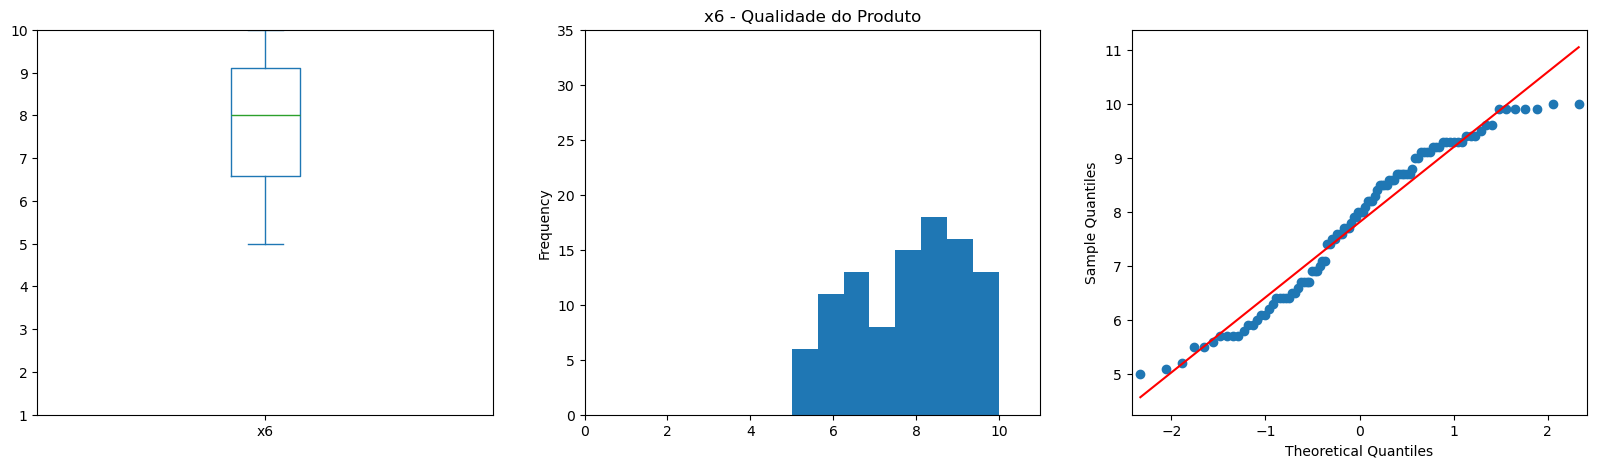

In [398]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x6"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x6"].plot(kind = 'hist', bins=8, ax=axes[1], xlim=(0, 11), title='x6 - Qualidade do Produto').set_ylim(0, 35)
qqplot(df["x6"], line='s', ax=axes[2])
plt.show()

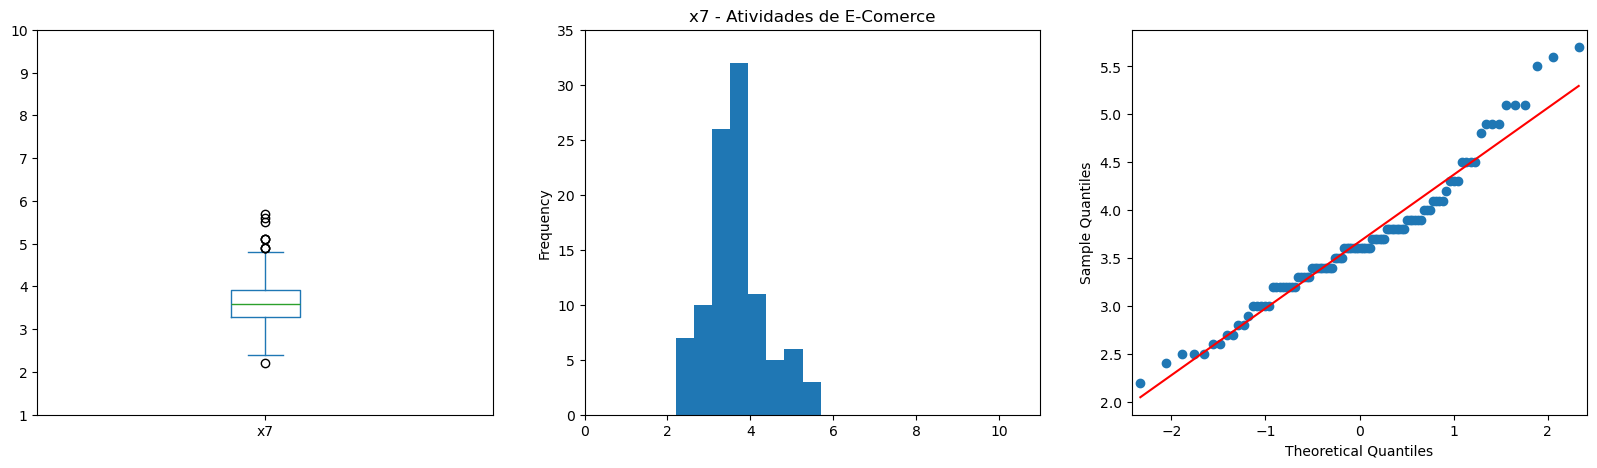

In [399]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x7"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x7"].plot(kind = 'hist', bins=8, ax=axes[1], xlim=(0, 11), title='x7 - Atividades de E-Comerce').set_ylim(0, 35)
qqplot(df["x7"], line='s', ax=axes[2])
plt.show()

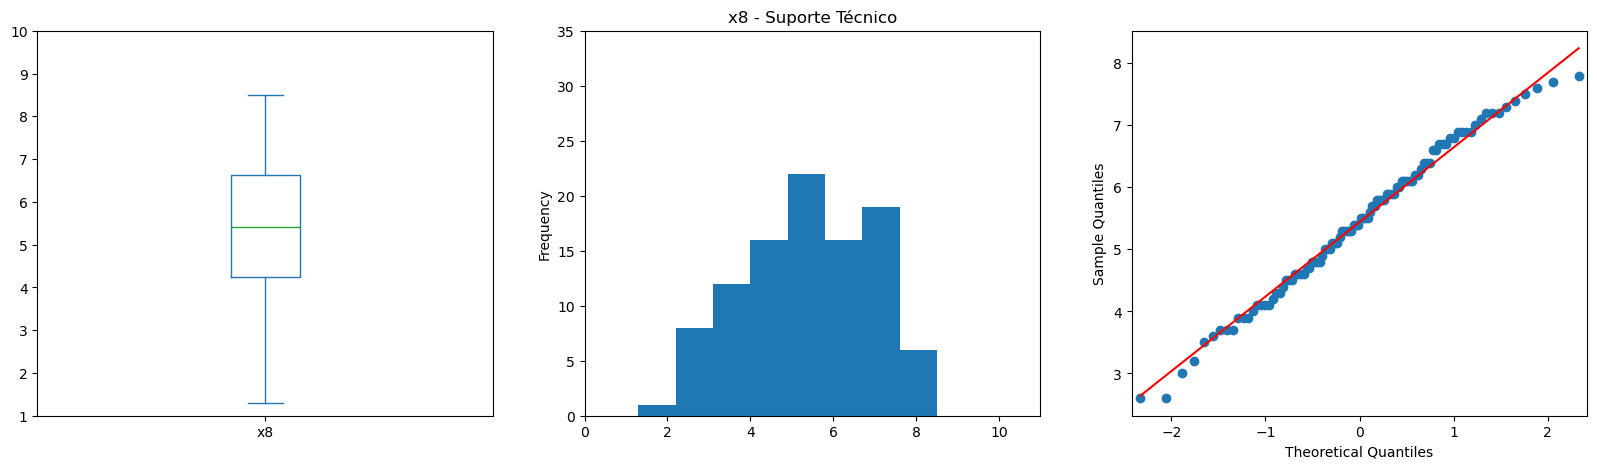

In [400]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x8"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x8"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x8 - Suporte T√©cnico').set_ylim(0, 35)
qqplot(df["x9"], line='s', ax=axes[2])
plt.show()

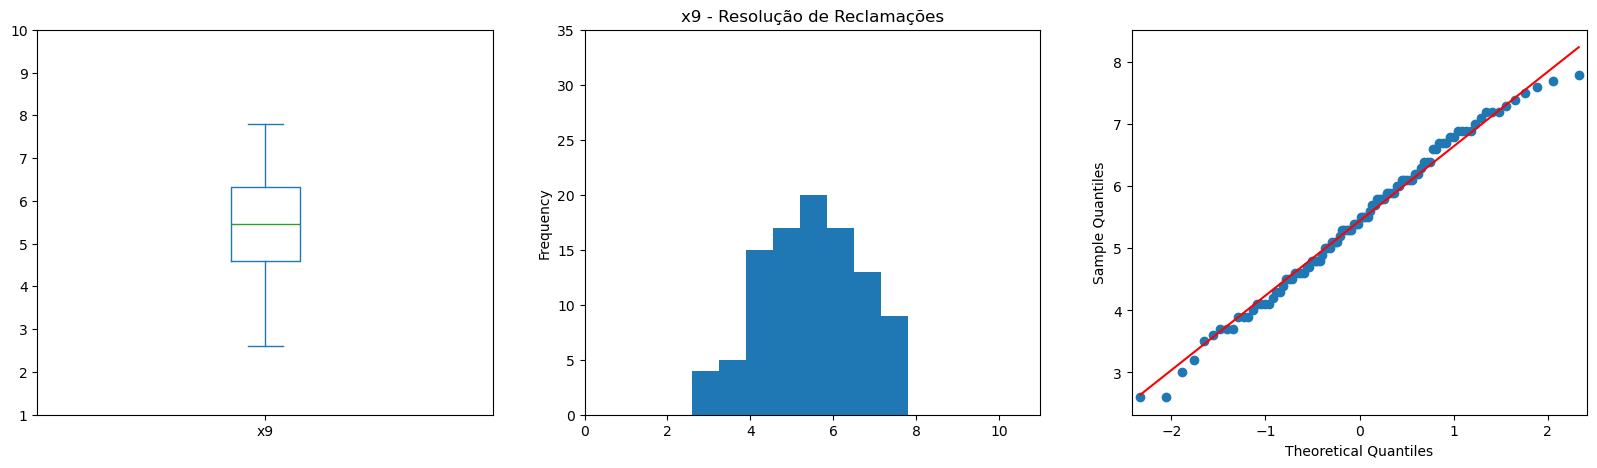

In [401]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x9"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x9"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x9 - Resolu√ß√£o de Reclama√ß√µes').set_ylim(0, 35)
qqplot(df["x9"], line='s', ax=axes[2])
plt.show()

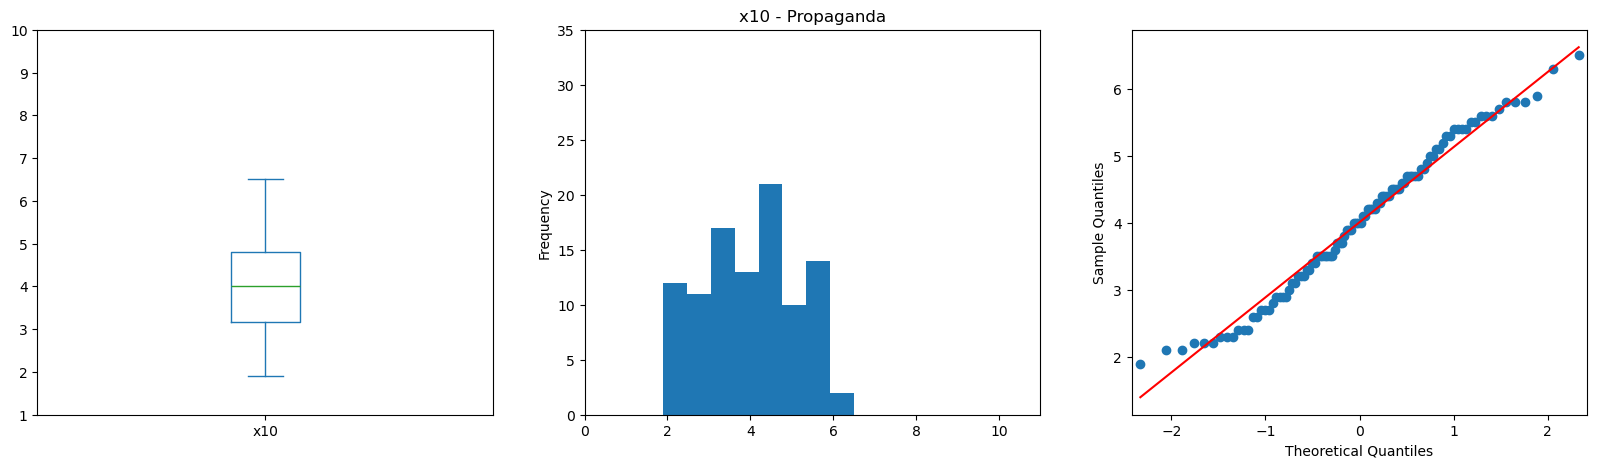

In [402]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x10"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x10"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x10 - Propaganda').set_ylim(0, 35)
qqplot(df["x10"], line='s', ax=axes[2])
plt.show()

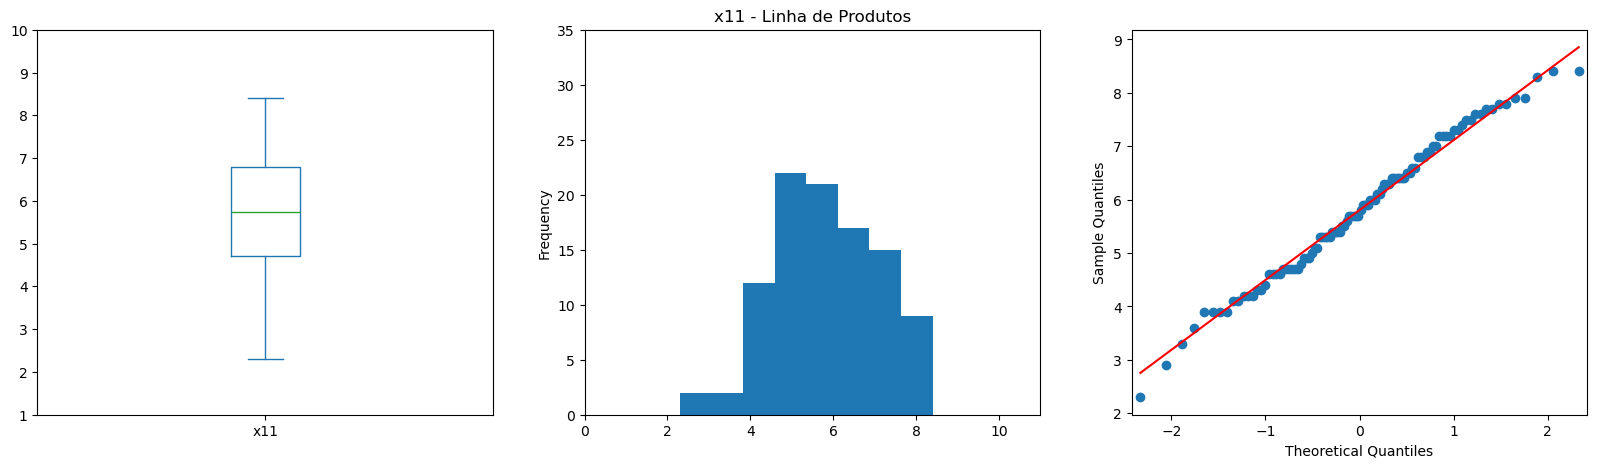

In [403]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x11"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x11"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x11 - Linha de Produtos').set_ylim(0, 35)
qqplot(df["x11"], line='s', ax=axes[2])
plt.show()

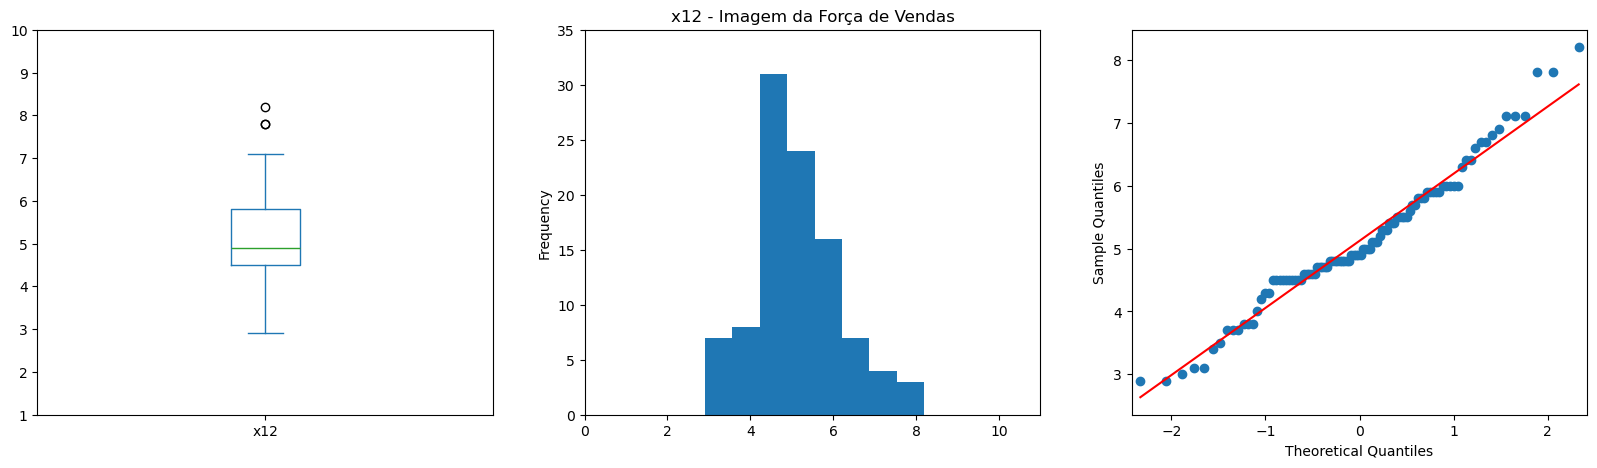

In [404]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x12"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x12"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x12 - Imagem da For√ßa de Vendas').set_ylim(0, 35)
qqplot(df["x12"], line='s', ax=axes[2])
plt.show()

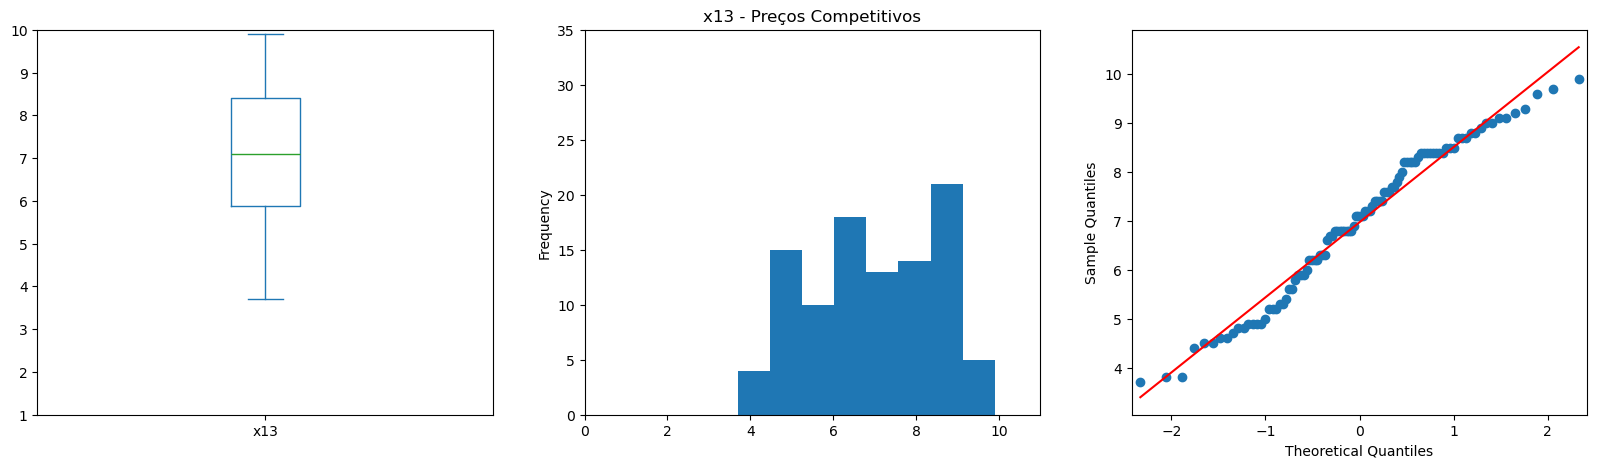

In [405]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x13"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x13"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x13 - Pre√ßos Competitivos').set_ylim(0, 35)
qqplot(df["x13"], line='s', ax=axes[2])
plt.show()

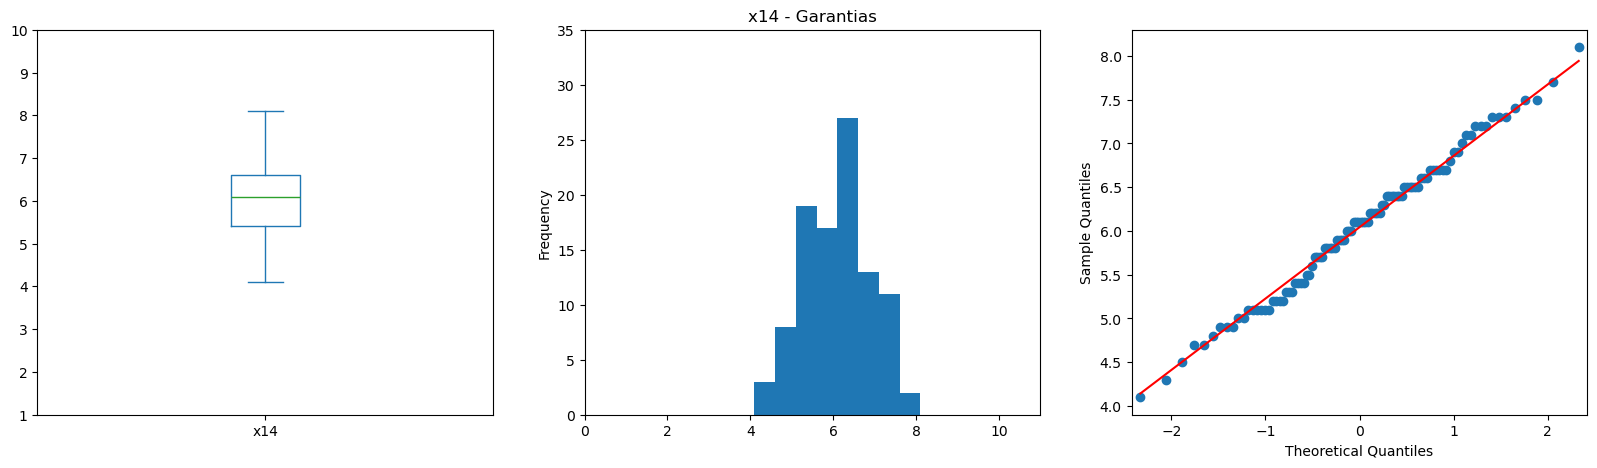

In [406]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x14"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x14"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x14 - Garantias').set_ylim(0, 35)
qqplot(df["x14"], line='s', ax=axes[2])
plt.show()

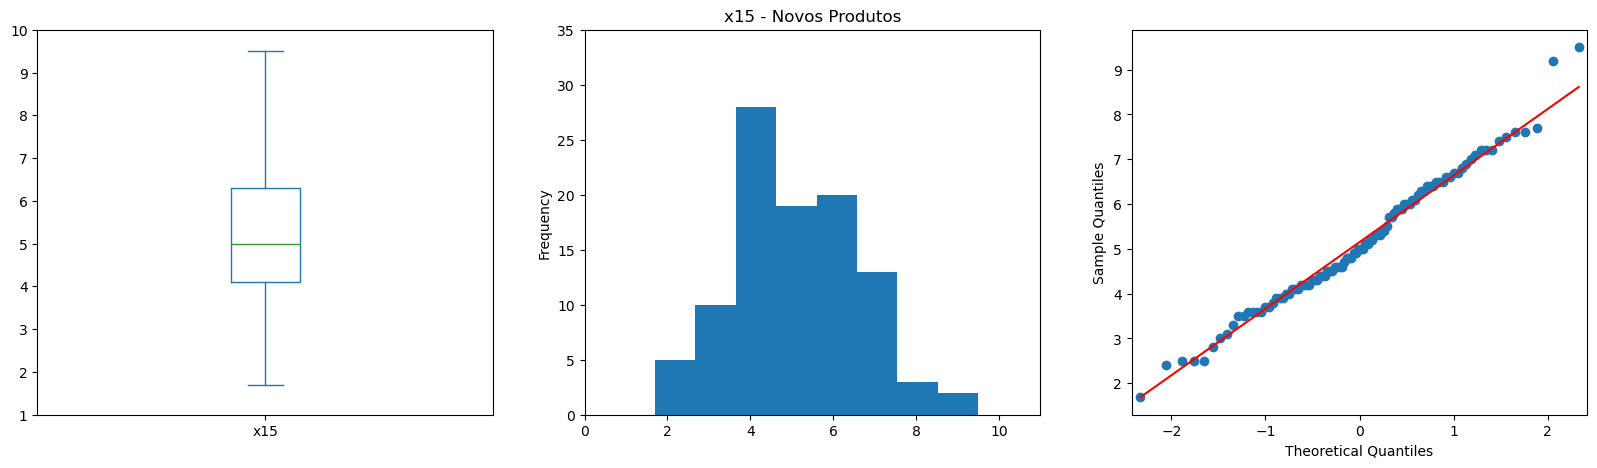

In [407]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x15"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x15"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x15 - Novos Produtos').set_ylim(0, 35)
qqplot(df["x15"], line='s', ax=axes[2])
plt.show()

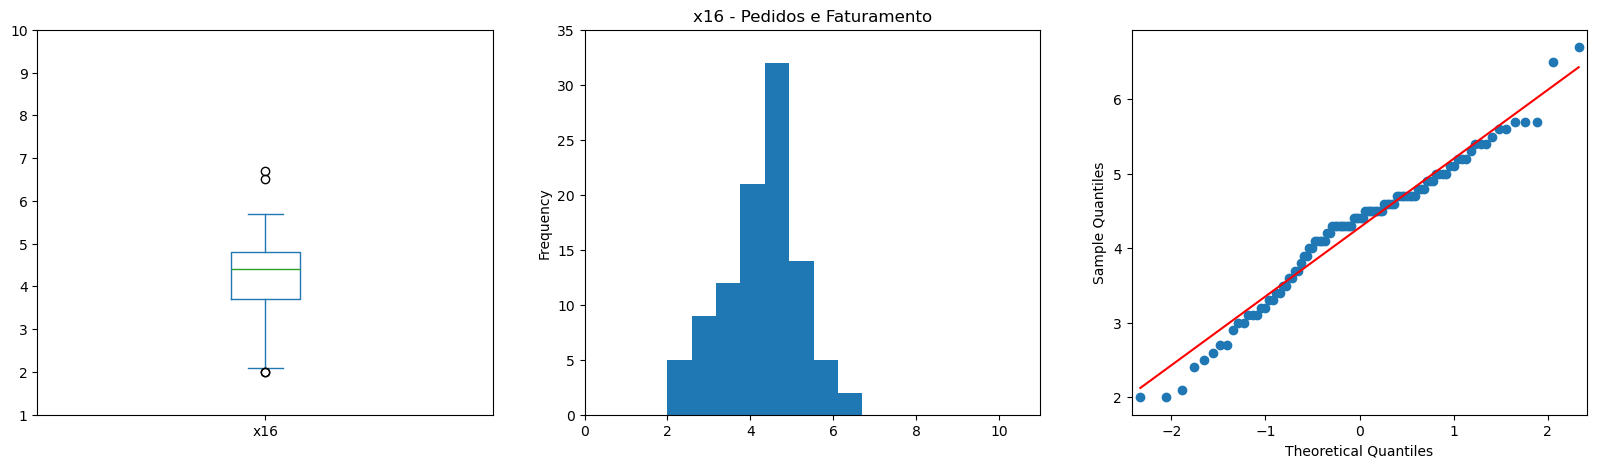

In [408]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x16"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x16"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x16 - Pedidos e Faturamento').set_ylim(0, 35)
qqplot(df["x16"], line='s', ax=axes[2])
plt.show()

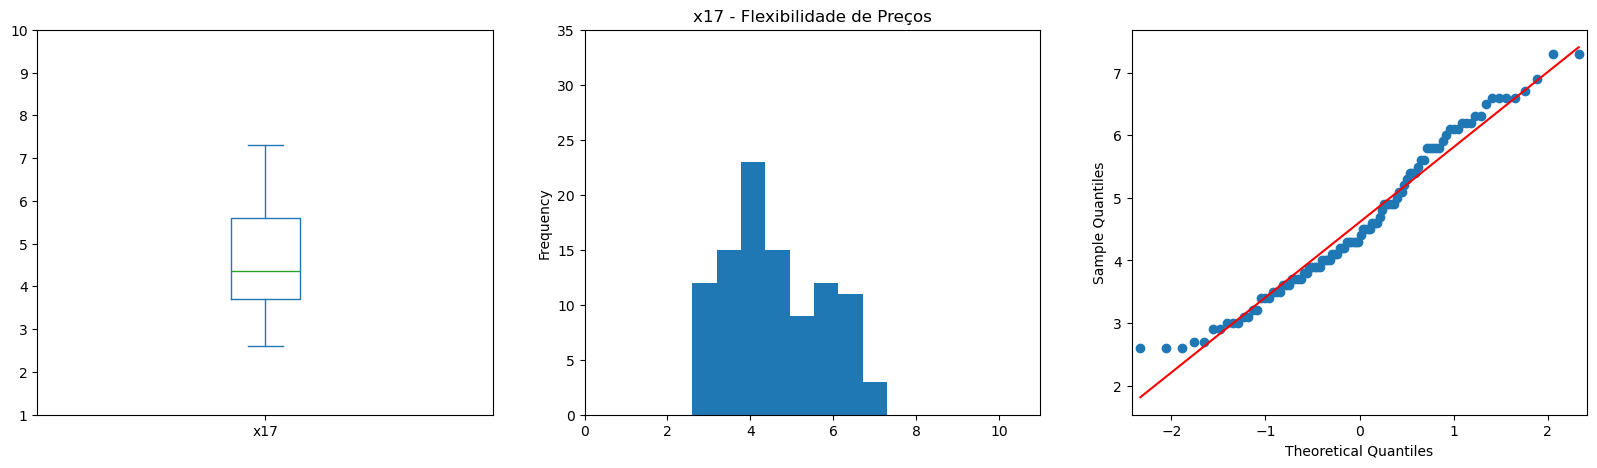

In [409]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x17"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x17"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x17 - Flexibilidade de Pre√ßos').set_ylim(0, 35)
qqplot(df["x17"], line='s', ax=axes[2])
plt.show()

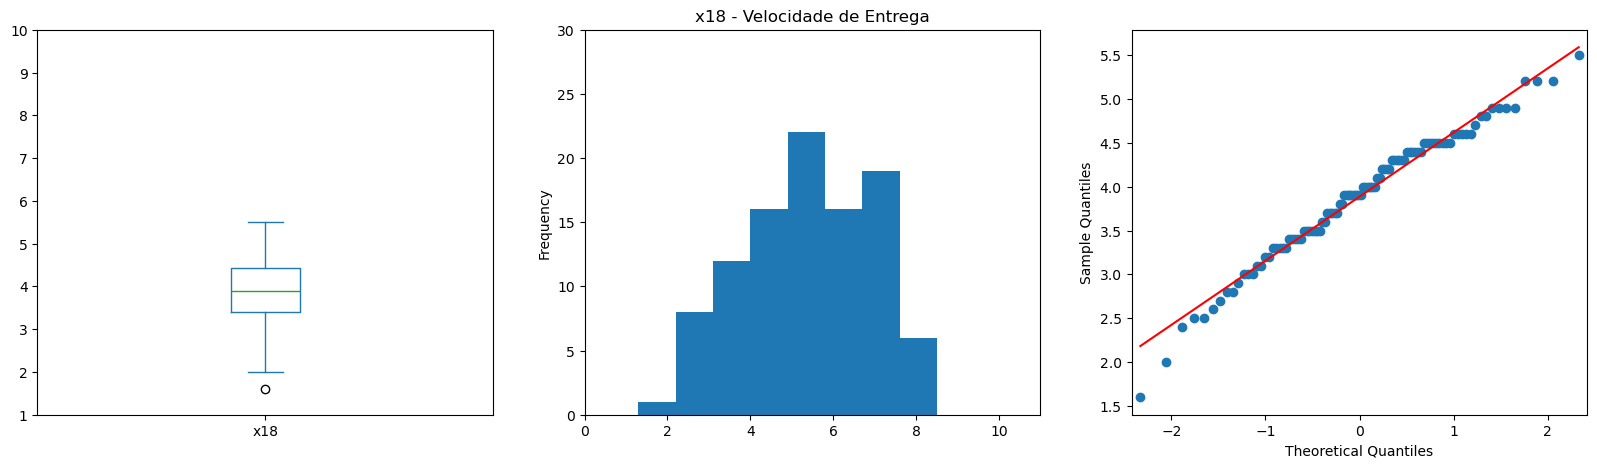

In [410]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x18"].plot(kind="box", ax=axes[0]).set_ylim(1, 10)
df["x8"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 11), title='x18 - Velocidade de Entrega').set_ylim(0, 30)
qqplot(df["x18"], line='s', ax=axes[2])
plt.show()

#### An√°lise

Analisando as figuras, √© poss√≠vel observar: Em rela√ß√£o √† vari√°vel x6 - Qualidade do Produto, que oe valores s√£o altos, sendo o atributo, bem avaliado pelos clientes e n√£o se observa presen√ßa de *outliers*. Em rela√ß√£o √† vari√°vel x7 - Atividades de E-Comerce, as notas s√£o baixas, sendo o atributo, mal avaliado pelos clientes. √â poss√≠vel observar que h√° presen√ßa de *outliers* e nos dois casos, os pontos plotados no QQ plot se distancial da linha, indicando poss√≠vel desvio da normalidade.


## Normalidade dos Dados

A partir da an√°lise gr√°fica, √© poss√≠vel observar poss√≠veis viola√ß√µes da normalidade. Contudo, testes devem ser conduzidos para certificar esta possibilidade.<br>

Existem muitos testes que podem ser utilizados para avaliar o quanto a dsitribui√ß√£o de uma determinada amostra se parece com a distribui√ß√£o Gaussiana (normal). Cada um dos testes abordam diferentes pressupostos e aspectos dos dados.

#### Interpreta√ß√£o dos Testes de Normalidade

Cada teste retorna ao menos dois par√¢metros:

> - Estat√≠stica: Um valor calculado que pode ser interpretado comparando-o com algum valor cr√≠tico de uma distribui√ß√£o estat√≠stica de deste.
> - p-valor: Usado para interpretar o teste. Neste caso, o quanto a distribui√ß√£o se aproxima de uma distribui√ß√£o normal.<br>

Para analisar a estat√≠sitca calculada, requer maior profundidade e profici√™ncia em estat√≠stica e no teste estat√≠stico espec√≠fico. Em contrapartida, o p-valor √© mais simples e pr√°tico para analisar.<br>

O teste assume que a amostra provem de uma distribui√ß√£o normal. Tecnicamente, chamada de hip√≥tese nula ou H0. O n√≠vel de confian√ßa, chamado alfa, tipicamente 5% (ou 0,05), √© usado para intepretar o p-valor.

> - p <= alfa: Rejeita H0, distribui√ß√£o n√£o normal
> - p > alfa: Falha em rejeitar H0, distribui√ß√£o normal

Em gereal, estamos procurando por p-valores maiores que alfa, confirmando que a distribui√ß√£o da amostra prov√©m de uma distribui√ß√£o normal.


In [413]:
# C√°culo do N (Listwise), Curtose e Assimetria para cada uma das vari√°veis

Normal = pd.DataFrame({'N': df[['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']].count(),
                     'Curtose': df[['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']].kurtosis(),
                     'Assimetria': df[['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']].skew()})

In [414]:
Normal.round(4)

N  Curtose  Assimetria
x6   100  -1.1318     -0.2445
x7   100   0.7353      0.6604
x8   100  -0.5482     -0.2033
x9   100  -0.5859     -0.1358
x10  100  -0.8876      0.0436
x11  100  -0.5218     -0.0924
x12  100   0.4095      0.3769
x13  100  -0.9034     -0.2399
x14  100  -0.4447      0.0084
x15  100   0.0164      0.2985
x16  100   0.2441     -0.3335
x17  100  -0.8159      0.3228
x18  100   0.2181     -0.4631

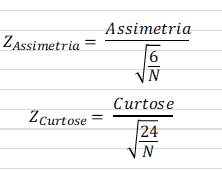

### Normalidade: An√°lise de Assimetria e Curtose - Valores Padronizados

A partir da assimetria e curtose, calcula-se a assimetria e curtose padronizados e compare-se este valor com os valores cr√≠ticos de z.

>Valores cr√≠ticos de ùëß:<br>
>> - ùëß= ¬±2,58 (ùë†ùëñùëîùëõùëñùëìùëñùëê√¢ùëõùëêùëñùëé ùëëùëí 0,01)<br>
>> - ùëß= ¬±1,96 (ùë†ùëñùëîùëõùëñùëìùëñùëê√¢ùëõùëêùëñùëé ùëëùëí 0,05)<br>

Se o valor ùëß calculado exceder o valor cr√≠tico especificado, ent√£o a distribui√ß√£o √© n√£o-normal<br>

### Normalidade: Teste K^2 de D‚ÄôAgostino

A partir da curtose e da assimetria, determina se uma distribui√ß√£o prov√©m de uma distribui√ß√£o normal.

<p> Fun√ß√£o Utilizada: <br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html">normaltest()</a> <br>
</p>

### Normalidade:Teste KS - Kolmogorov-Smirnov

Este teste avalia se uma dada distribui√ß√£o para uma vari√°vel rand√¥mica se aproxima da distribui√ß√£o da vari√°vel analisada.

<p> Fun√ß√£o Utilizada: <br>
<a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html">kstest()</a> <br>
</p>


### Normalidade:Teste W - Shapiro-Wilk

Testa a hip√≥tese nulal de que os dados prov√©m de uma distribui√ß√£o normal.

<p> Fun√ß√£o Utilizada: <br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html">shapiro()</a> <br>
</p>

In [417]:
# C√°culo da Curtose e Assimetria padronizadas para cada uma das vari√°veis
Normal['Z_Curtose'] = Normal['Curtose'] / np.sqrt(24/Normal['N'])
Normal['Z_Assimetria'] = Normal['Assimetria'] / np.sqrt(6/Normal['N'])

In [418]:
colunas = ['x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']

In [419]:
# C√°lculo da estat√≠sticas e p-valores para os teste K^2 de D‚ÄôAgostino, ks e w
j = 0
while j < len(colunas):
    Normal.at[colunas[j], 'normal_qui'] = st.normaltest(df[colunas[j]])[0]
    Normal.at[colunas[j], 'p-valor_qui'] = st.normaltest(df[colunas[j]])[1]
    Normal.at[colunas[j], 'ks'] = st.kstest(df[colunas[j]], 'norm')[0]
    Normal.at[colunas[j], 'p-valor_ks'] = st.kstest(df[colunas[j]], 'norm')[1]
    Normal.at[colunas[j], 'w'] = shapiro(df[colunas[j]])[0]
    Normal.at[colunas[j], 'p-valor_w'] = shapiro(df[colunas[j]])[1]
    
    j +=1

In [420]:
Normal.round(4)

N  Curtose  Assimetria  Z_Curtose  Z_Assimetria  normal_qui  \
x6   100  -1.1318     -0.2445    -2.3104       -0.9982     26.1400   
x7   100   0.7353      0.6604     1.5010        2.6960      8.9967   
x8   100  -0.5482     -0.2033    -1.1191       -0.8298      2.6773   
x9   100  -0.5859     -0.1358    -1.1959       -0.5544      2.6962   
x10  100  -0.8876      0.0436    -1.8118        0.1780      9.2436   
x11  100  -0.5218     -0.0924    -1.0651       -0.3774      1.8237   
x12  100   0.4095      0.3769     0.8359        1.5387      3.3971   
x13  100  -0.9034     -0.2399    -1.8441       -0.9795     10.8593   
x14  100  -0.4447      0.0084    -0.9077        0.0342      1.0420   
x15  100   0.0164      0.2985     0.0335        1.2187      1.6278   
x16  100   0.2441     -0.3335     0.4984       -1.3617      2.4132   
x17  100  -0.8159      0.3228    -1.6654        1.3177      8.6632   
x18  100   0.2181     -0.4631     0.4452       -1.8906      4.0314   

     p-valor_qui      ks  p-valor_ks       w  p-valor_w  
x6        0.0000  1.0000         0.0  0.9497     0.0008  
x7        0.0111  0.9861         0.0  0.9585     0.0032  
x8        0.2622  0.9838         0.0  0.9863     0.3900  
x9        0.2597  0.9953         0.0  0.9865     0.4023  
x10       0.0098  0.9721         0.0  0.9763     0.0677  
x11       0.4018  0.9893         0.0  0.9869     0.4324  
x12       0.1829  0.9981         0.0  0.9740     0.0453  
x13       0.0044  0.9999         0.0  0.9676     0.0145  
x14       0.5939  1.0000         0.0  0.9909     0.7404  
x15       0.4431  0.9818         0.0  0.9860     0.3728  
x16       0.2992  0.9772         0.0  0.9741     0.0455  
x17       0.0131  0.9953         0.0  0.9655     0.0100  
x18       0.1332  0.9718         0.0  0.9816     0.1770

### An√°lise da Normalidade

Ao observar os testes de normalidade, considerando a Curtose e Assimetria padronizados (Z_Curtose  Z_Assimetria), a um n√≠vel de signific√¢ncia de 0,05, as vari√°veis x6 e x7 violam a condi√ß√£o de normalidade. Contudo, a um n√≠vel de signific√¢ncia de 0,01, apenas a vari√°vel X7 viola a condi√ß√£o de normalidade.<br>
Considerando o teste K^2 de D‚ÄôAgostino, as vari√°veis X6, X7, X10, X13 e X17 violam o pressuposto de normalidade.<br>
Considerando o KS, todos as vari√°veis violam o pressuposto de normalidade.<br>
Considerando o W, as vari√°veis X6, X7, X13 e X17 violam o pressuposto de normalidade.<br>

### Transforma√ß√£o da vari√°vel x7

Executar alguma transforma√ß√£o da vari√°vel com o objetivo de atingir a distribui√ß√£o normal.

In [423]:
df['x7_log'] = np.log(df['x7'])

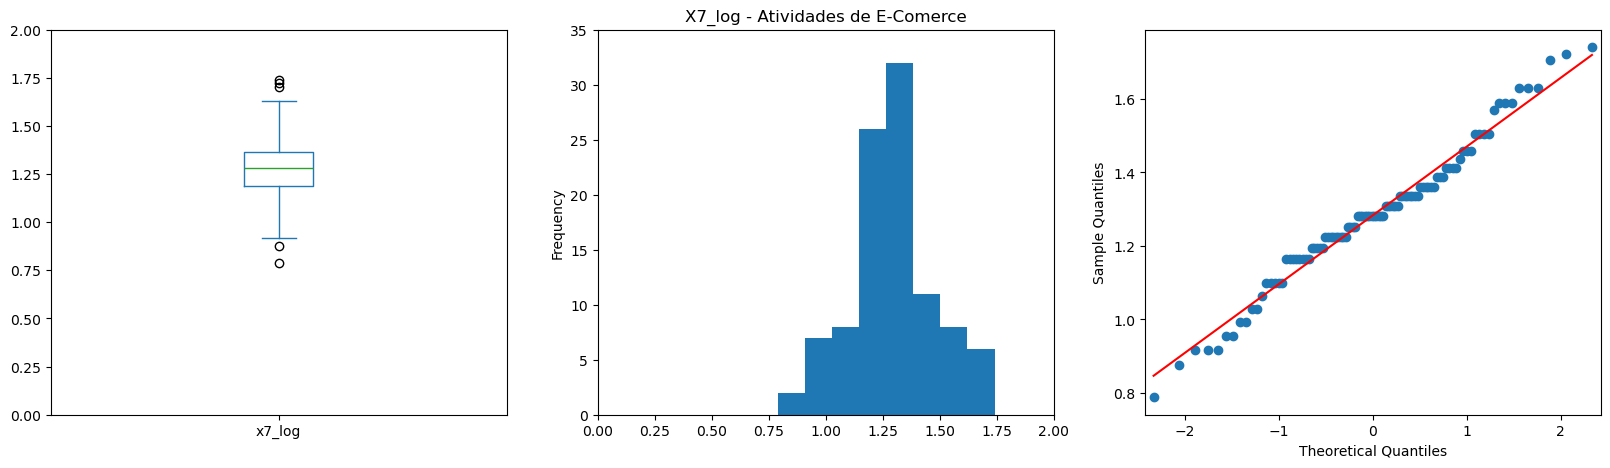

In [424]:
plt.rcParams["figure.figsize"] = (20,5)
fig, axes = plt.subplots(1, 3)
df["x7_log"].plot(kind="box", ax=axes[0]).set_ylim(0, 2)
df["x7_log"].plot(kind='hist', bins=8, ax=axes[1], xlim=(0, 2), title='X7_log - Atividades de E-Comerce').set_ylim(0, 35)
qqplot(df["x7_log"], line='s', ax=axes[2])
plt.show()

In [425]:
qui, p_value_qui = st.normaltest(df['x7_log'])

In [426]:
round(qui,3), round(p_value_qui,3)

(0.72, 0.698)

In [427]:
ks, p_value_ks = st.kstest(df['x7_log'], 'norm')

In [428]:
round(ks,6), round(p_value_ks,6)

(0.800243, 0.0)

In [429]:
w, p_value_w = shapiro(df['x7_log'])

In [430]:
round(w,3), round(p_value_w,6)

(0.981, 0.150771)

## Correla√ß√£o entre os Dados

Matriz de correla√ß√µes
> - Examinar a matriz de correla√ß√µes e verificar se existem valores significativos para justificar a utiliza√ß√£o da t√©cnica. Caso as correla√ß√µes entre TODAS as vari√°veis sejam baixas, talvez a an√°lise fatorial n√£o seja apropriada
> - Espera-se que vari√°veis que apresentam alta correla√ß√£o tendem a compartilhar o mesmo fator
> - A matriz de correla√ß√£o mede a associa√ß√£o linear entre as vari√°veis por meio do coeficiente de correla√ß√£o de Pearson
> - Se n√£o houver um n√∫mero substancial de valores de correla√ß√£o superiores a 0,30, h√° fortes ind√≠cios de que a utiliza√ß√£o da t√©cnica n√£o √© apropriada. (HAIR,et all; 2009). Contudo, cabe destacar que depende do tamanho da amostra.

A partir deste ponto, utilizar a vari√°vel x7 transformada (x7_log) em lugar de x7. 

### Correla√ß√£o

Calcula a correla√ß√£o entre pares de vari√°veis.

<p> Fun√ß√£o Utilizada: <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html">corr()</a> <br>
</p>

Contudo, esta fun√ß√£o n√£o gera o p-valor (signific√¢nca estat√≠sitca)

In [433]:
df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']].corr().round(4)

x6  x7_log      x8      x9     x10     x11     x12     x13  \
x6      1.0000 -0.1524  0.0956  0.1064 -0.0535  0.4775 -0.1518 -0.4013   
x7_log -0.1524  1.0000 -0.0107  0.1017  0.4417 -0.0845  0.7835  0.2549   
x8      0.0956 -0.0107  1.0000  0.0967 -0.0629  0.1926  0.0170 -0.2708   
x9      0.1064  0.1017  0.0967  1.0000  0.1969  0.5614  0.2298 -0.1280   
x10    -0.0535  0.4417 -0.0629  0.1969  1.0000 -0.0116  0.5422  0.1342   
x11     0.4775 -0.0845  0.1926  0.5614 -0.0116  1.0000 -0.0613 -0.4949   
x12    -0.1518  0.7835  0.0170  0.2298  0.5422 -0.0613  1.0000  0.2646   
x13    -0.4013  0.2549 -0.2708 -0.1280  0.1342 -0.4949  0.2646  1.0000   
x14     0.0883  0.0373  0.7972  0.1404  0.0108  0.2731  0.1075 -0.2450   
x15     0.0270 -0.0544 -0.0736  0.0594  0.0842  0.0462  0.0316  0.0232   
x16     0.1043  0.1367  0.0801  0.7569  0.1842  0.4244  0.1951 -0.1146   
x17    -0.4931  0.2810 -0.1861  0.3945  0.3336 -0.3780  0.3522  0.4711   
x18     0.0277  0.1687  0.0254  0.8651  0.2759  0.6019  0.2716 -0.0729   

           x14     x15     x16     x17     x18  
x6      0.0883  0.0270  0.1043 -0.4931  0.0277  
x7_log  0.0373 -0.0544  0.1367  0.2810  0.1687  
x8      0.7972 -0.0736  0.0801 -0.1861  0.0254  
x9      0.1404  0.0594  0.7569  0.3945  0.8651  
x10     0.0108  0.0842  0.1842  0.3336  0.2759  
x11     0.2731  0.0462  0.4244 -0.3780  0.6019  
x12     0.1075  0.0316  0.1951  0.3522  0.2716  
x13    -0.2450  0.0232 -0.1146  0.4711 -0.0729  
x14     1.0000  0.0352  0.1971 -0.1703  0.1094  
x15     0.0352  1.0000  0.0685  0.0941  0.1057  
x16     0.1971  0.0685  1.0000  0.4070  0.7510  
x17    -0.1703  0.0941  0.4070  1.0000  0.4967  
x18     0.1094  0.1057  0.7510  0.4967  1.0000

### Correla√ß√£o 1: Outra fun√ß√£o para calcular a correla√ß√£o e Siginfic√¢ncia

Calcula a correla√ß√£o entre pares de vari√°veis. Contudo, a apresenta√ß√£o n√£o √© por matriz.

<p> Fun√ß√£o Utilizada: <br>
<a href="https://researchpy.readthedocs.io/en/latest/corr_pair_documentation.html">corr_pair()</a> <br>
</p>


In [435]:
rs.correlation.corr_pair(df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']])

r value p-value    N
x6 & x7_log  -0.1524  0.1301  100
x6 & x8       0.0956  0.3441  100
x6 & x9       0.1064  0.2922  100
x6 & x10     -0.0535  0.5972  100
x6 & x11      0.4775  0.0000  100
...              ...     ...  ...
x15 & x17     0.0941  0.3516  100
x15 & x18     0.1057  0.2950  100
x16 & x17     0.4070  0.0000  100
x16 & x18     0.7510  0.0000  100
x17 & x18     0.4967  0.0000  100

[78 rows x 3 columns]

### Correla√ß√£o 2: Outra fun√ß√£o para calcular a correla√ß√£o e Siginfic√¢ncia

Calcula a correla√ß√£o entre pares de vari√°veis. Contudo, a apresenta√ß√£o n√£o √© por matriz.

<p> Fun√ß√£o Utilizada: <br>
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html">pearsonr()</a> <br>
</p>


In [437]:
r = st.pearsonr(df["x6"], df["x7_log"])[0].round(4)

In [438]:
r

-0.1524

In [439]:
p_value_r = st.pearsonr(df["x6"], df["x7_log"])[1].round(4)

In [440]:
p_value_r

0.1301

### Correla√ß√£o - An√°lise

Observando as correla√ß√µes entre os pares de vari√°veis, √© poss√≠vel constatar que existe correla√ß√£o estatisticamente significante entre v√°rios pares, o que permite prosseguir com a an√°lise fatorial.


### Teste de Esfericidade de Bartlett

> - Avalia a hip√≥tese ( ùêª_0) de que a matriz das correla√ß√µes pode ser a matriz identidade com determinante igual a 1
> - Se ùêª_0 n√£o √© rejeitada, as inter-rela√ß√µes entre as vari√°veis s√£o iguais a 0. As vari√°veis n√£o est√£o correlacionadas.  A utiliza√ß√£o da AF n√£o √© adequado.
> - As vari√°veis devem apresentar normalidade multivariada.



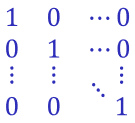

<p> Fun√ß√£o Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.calculate_bartlett_sphericity">bartlett</a> <br>
</p>


In [445]:
chi_square_value,p_value = bartlett(df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']])
print('Qui_Quadrado: ', chi_square_value.round(3))
print('p_valor: ', p_value.round(3))

Qui_Quadrado:  949.461
p_valor:  0.0


### An√°lise

Teste de esfericidade de Bartlett testa a hip√≥tese de a matriz das correla√ß√µes ser a matriz identidade (determinante igual a 1)
> - p-value = 0,000
> - Conduz √† rejei√ß√£o da hip√≥tese de a matriz de correla√ß√µes ser a matriz identidade, evidenciando a correla√ß√£o entre as vari√°veis


### KMO

> KMO ‚Äì Kaiser-Meyer-Olkin (KMO)
>> - Compara as correla√ß√µes simples com as correla√ß√µes parciais
>> - Avalia a adequa√ß√£o da amostra quanto ao grau de correla√ß√£o parcial entre as vari√°veis:

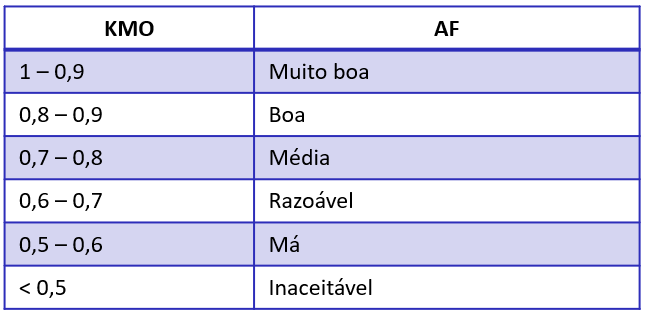

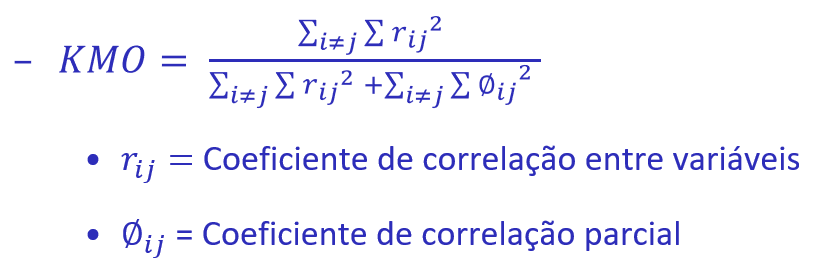

### MSA

> - √â uma forma de obter ind√≠cios acerca da necessidade de elimina√ß√£o de determinada vari√°vel do modelo;
> - Calcula-se uma Medida de Adequa√ß√£o da Amostra (Measure of Sampling Adequacy ‚Äì MSA), para cada vari√°vel. Inclui apenas os coeficientes que se deseja analisar
> - Quanto maior os valores, melhor a utiliza√ß√£o da AF.
> - Baixo valore pode sugerir a exclus√£o da vari√°vel do modelo.


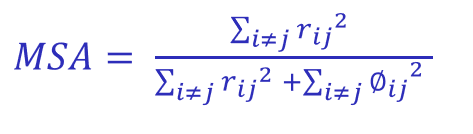

<p> Fun√ß√£o Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.calculate_kmo">kmo</a> <br>
</p>


In [452]:
MSA,kmo_model=kmo(df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']])

In [453]:
print('KMO: ', kmo_model.round(3))

KMO:  0.605


In [454]:
MSA

array([0.8753894 , 0.60576254, 0.52648209, 0.87219049, 0.82046176,
       0.44591649, 0.57875527, 0.88460002, 0.52808773, 0.28432035,
       0.85395677, 0.4407795 , 0.53108288])

In [455]:
# Impress√£o dos valores do MSA
print('MSA')
variaveis = ['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
i = 0
while i < len(variaveis):
    print(variaveis[i], ': ', round(MSA[i],3))
    i +=1

MSA
x6 :  0.875
x7_log :  0.606
x8 :  0.526
x9 :  0.872
x10 :  0.82
x11 :  0.446
x12 :  0.579
x13 :  0.885
x14 :  0.528
x15 :  0.284
x16 :  0.854
x17 :  0.441
x18 :  0.531


### An√°lise - KMO / MSA

KMO: 
> Varia entre 0 e 1, compara as correla√ß√µes simples com as parciais observadas entre as vari√°veis
> KMO = 0,6 tora razo√°vel a aplica√ß√£o da AF, de acordo com quadro de refer√™ncia apresentado anteriormente

MSA: 
> - Valores abaixo de 0,5 indicam que a vari√°vel pode n√£o se ajustar √† estrutura definida pelas outras vari√°veis e, portanto, poder√° ser eliminada. Neste caso, elimina-se a vari√°vel com MSA mais baixo e recalcula-se as estat√≠sticas de ajuste. Caso o MSA de alguma vari√°vel ainda continue abaixo de 0,5, repete-se o procedimento.<br> 
> - Neste caso, a primeira vari√°vel a ser eliminada seria a x15, com MSA = 0,28<br> 
> - Opcionalmente, ao inv√©s de eliminar a vari√°vel, pode-se deix√°-la e observar a sua comunalidade. Se for alta, poder√° representar sozinha um fator.


_______________________________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________________________
## An√°lise Fatorial - Ajuste do Modelo

An√°lise Fatorial Exploratoria (AFE) √© uma t√©cnica estat√≠stica utilizada para identificar relacionamentos latentes a partir de um conjunto de vari√°veis observ√°veis.

 
<p> Biblioteca utilizada:: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer">factor-analyzer</a> <br>
</p>

Em princ√≠pio, a proposta √© de reten√ß√£o de 5 fatores. Contudo, ap√≥s a execu√ß√£o √© necess√°rio avaliar o n√∫mero recomendado e, caso necess√°rio, executar novamente com o n√∫mero de fatores edequado.<br>
Os outros par√¢metros foram **rota√ß√£o varimax** e extra√ß√£o os fatores por **Componentes Princiapias**

<p> Fun√ß√£o Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer">FactorAnalyzer</a> <br>
</p>


In [459]:
fea = fa(rotation='varimax',n_factors=5, method='principal')
fea.fit(df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']])

FactorAnalyzer(method='principal', n_factors=5, rotation='varimax',
               rotation_kwargs={})

### Comunalidade

> - Comunalidade: Parcela da vari√¢ncia de ùëã_ùëñque √© explicada pelos fatores comuns.

> - Especificidade: Parcela de vari√¢ncia de ùëã_ùëñ que n√£o √© explicada pelos fatores

> - A comunalidade √© um √≠ndice da variabilidade total explicada por todos os fatores para cada vari√°vel

> - Comunalidade + Especificidade = 1


<p> Fun√ß√£o Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer.get_communalities">get_communalities</a> <br>
</p>


In [461]:
comunalidade = fea.get_communalities().round(3)

In [462]:
comunalidade

array([0.687, 0.804, 0.893, 0.882, 0.591, 0.841, 0.852, 0.592, 0.901,
       0.975, 0.772, 0.891, 0.925])

In [463]:
# Impress√£o dos valores do MSA
print('Comunalidades')
variaveis = ['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
i = 0
while i < len(variaveis):
    print(variaveis[i], ': ', round(comunalidade[i],3))
    i +=1

Comunalidades
x6 :  0.687
x7_log :  0.804
x8 :  0.893
x9 :  0.882
x10 :  0.591
x11 :  0.841
x12 :  0.852
x13 :  0.592
x14 :  0.901
x15 :  0.975
x16 :  0.772
x17 :  0.891
x18 :  0.925


### An√°lise - Comunalidade

> - A comunalidade representa a vari√¢ncia total explicada pelos fatores em cada vari√°vel. A comunalidade inicial √© igual a 1 e, ap√≥s a extra√ß√£o, variam entre 0 e 1. <br>
> - Neste caso, todas as vari√°veis possuem forte rela√ß√£o com os fatores retidos pois as comunalidades s√£o altas.



### Autovalores e Fatores Retidos

> - Crit√©rio da raiz latente:<br>
>> - Apenas fatores que t√™m autovalores (eigenvalues) maiores que 1 s√£o considerados significantes, os demais s√£o descartados; Isto porque, no m√≠nimo, o componente deve explicar a vari√¢ncia de uma vari√°vel utilizada no modelo (m√©dia 0 e desvio 1)<br>
>> - Os eigenvalues mostram a vari√¢ncia explicada por cada fator, ou seja, quanto cada fator consegue explicar da vari√¢ncia total<br>


<p> Fun√ß√£o Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer.get_eigenvalues">get_eigenvalues</a> <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.factor_analyzer.FactorAnalyzer.get_factor_variance">get_factor_variance</a> <br></p>




In [466]:
ev, v = fea.get_eigenvalues()

In [467]:
autovalor, var, var_acum = fea.get_factor_variance()

In [468]:
# Impress√£o dos autovalores originais, vari√¢ncia original, autovalores rotacionados e vari√¢ncia rotacionada
print('         Vari√¢ncia Total Explicada')

print('Componente', '| Auovalor', '| Vari√¢ncia(%)', '| Vari√¢ncia Acum.', '| Autovalor Rotacionado', '| Vari√¢ncia Rotacionada', '| Vari√¢ncia Acum. Rot')
variaveis = ['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
i = 0
var_acum1 = 0
while i < len(variaveis):
    var_acum1 += ev[i]/len(variaveis)
    if i < len(autovalor):
        print(i+1, '          ', round(ev[i],3), '    ', round(ev[i]/len(variaveis) * 100,3), '       ', round(var_acum1 * 100,3),'         ', 
              round(autovalor[i], 3), '                   ', round(var[i]*100, 3), '                 ', round(var_acum[i]*100, 3) )
    else:
        print(i+1, '          ', round(ev[i],3),'    ',  round(ev[i]/len(variaveis) * 100,3), '        ', round(var_acum1 * 100,3) )
    i +=1

         Vari√¢ncia Total Explicada
Componente | Auovalor | Vari√¢ncia(%) | Vari√¢ncia Acum. | Autovalor Rotacionado | Vari√¢ncia Rotacionada | Vari√¢ncia Acum. Rot
1            3.545      27.271         27.271           3.14                     24.156                   24.156
2            3.024      23.263         50.533           2.305                     17.728                   41.884
3            1.742      13.402         63.935           1.864                     14.336                   56.22
4            1.285      9.887         73.822           2.264                     17.412                   73.632
5            1.009      7.764         81.586           1.034                     7.954                   81.586
6            0.608      4.673          86.259
7            0.546      4.198          90.457
8            0.446      3.428          93.885
9            0.282      2.167          96.052
10            0.209      1.611          97.663
11            0.168      1.289         

### An√°lise - Fatores Retidos e Vari√¢ncia Explicada

> - Com base regra de reten√ß√£o de fatores com valores superiores a 1, foram retidos 5 fatores que conseguem explicar 81,586% da vari√¢ncia dos dados originais.<br> 
> - Antes da rota√ß√£o, o primeiro componente explica 27,271% da vari√¢ncia dos dados e ap√≥s a rota√ß√£o, 24,156%. <br>
> - A tabela mostra tamb√©m o percentual da vari√¢ncia explicada por fator antes e depois da rota√ß√£o




### Fatores Retidos - Scree Plot

> - Crit√©rio do Gr√°fico Scree:
>> - Esse teste √© usado para identificar o n√∫mero √≥timo de fatores que podem ser extra√≠dos antes que a quantia de vari√¢ncia √∫nica comece a dominar a estrutura de vari√¢ncia comum.
>> - Raiz latente, ou eigenvalues, no eixo Y e o n√∫mero de fatores no eixo X, de acordo com a ordem de extra√ß√£o. A partir do ponto que o gr√°fico passa a se tornar mais horizontal, reflete um indicativo do n√∫mero m√°ximo de fatores a serem extra√≠dos.
>> - Neste caso, refor√ßa a reten√ß√£o dos 5 fatores. 



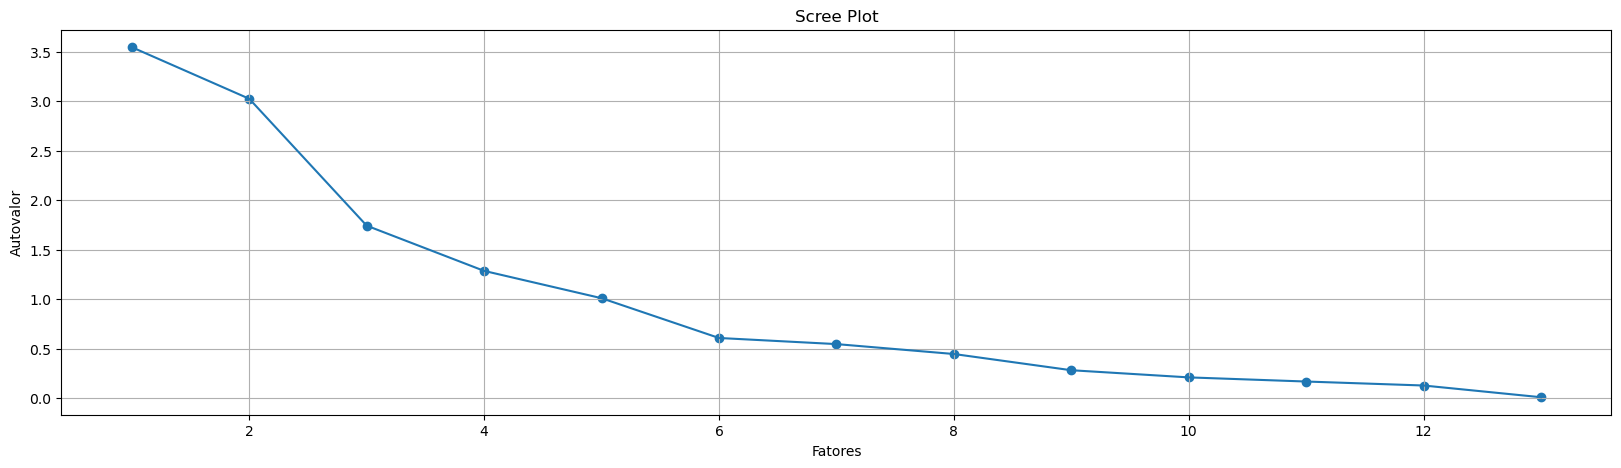

In [471]:
# Cria o Scree Plot utilizando-se MAtPlotLib
plt.scatter(range(1,14),ev)
plt.plot(range(1,14),ev)
plt.title('Scree Plot')
plt.xlabel('Fatores')
plt.ylabel('Autovalor')
plt.grid()
plt.show()

### Carga Fatorial e Interpreta√ß√£o dos Fatores

> - Interpretar e nomear os fatores por meio das cargas fatoriais
> - Em geral, considera-se cargas fatoriais maiores que 0,30.
> - Cargas superiores a 0,40 s√£o consideradas importantes
> - Maiores que 0,50 s√£o consideradas estatisticamente significativas
> - Cargas fatoriais significantes dependem do tamanho da amostra
> - Os valores da tabela apresenta orienta√ß√µes para identifica√ß√£o de cargas fatoriais significantes e tamanho de amostras ao n√≠vel de 5%.
> - O valor da carga fatorial representa a quantia de vari√¢ncia total da vari√°vel explicada pelo fator.




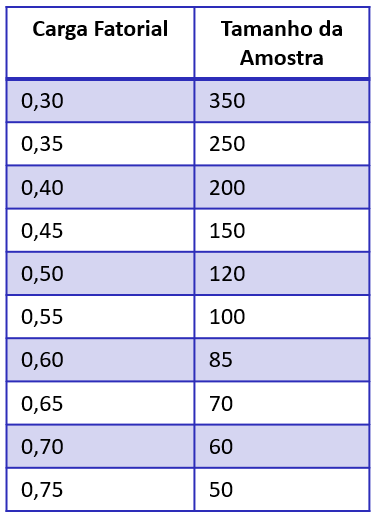

<p> Fun√ß√£o Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.confirmatory_factor_analyzer.ConfirmatoryFactorAnalyzer.loadings_">loadings_</a> <br>
</p>

In [475]:
carga_fatorial = fea.loadings_.round(3)

In [476]:
# Impress√£o dos autovalores originais, vari√¢ncia original, autovalores rotacionados e vari√¢ncia rotacionada
print('         Matriz de Componente Rotativa')
print('                      Componentes (', len(carga_fatorial[0]), ')')
print('Vari√°vel')

variaveis = ['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']
i = 0
while i < len(variaveis):
    print(variaveis[i], '      ', carga_fatorial[i])
    i +=1

         Matriz de Componente Rotativa
                      Componentes ( 5 )
Vari√°vel
x6        [ 0.039  0.824 -0.047 -0.01   0.055]
x7_log        [ 0.033 -0.128  0.028  0.877 -0.127]
x8        [ 0.025  0.101  0.936 -0.025 -0.068]
x9        [0.929 0.077 0.053 0.099 0.003]
x10        [ 0.163 -0.041 -0.068  0.731  0.153]
x11        [ 0.56   0.713  0.134 -0.044  0.007]
x12        [ 0.135 -0.156  0.076  0.896 -0.008]
x13        [-0.117 -0.686 -0.232  0.229  0.035]
x14        [0.1   0.123 0.932 0.058 0.057]
x15        [ 0.051 -0.003 -0.008  0.013  0.986]
x16        [0.869 0.017 0.091 0.094 0.021]
x17        [ 0.49  -0.756 -0.148  0.225  0.081]
x18        [0.945 0.024 0.001 0.166 0.057]


### Composi√ß√£o dos Fatores

As vari√°veis s√£o agrupadas em fatores a partir da carga fatorial. Ao analisar a linha, a vari√°vel se agrupar√° ao fator cuja carga fatorial seja a maior, em valor absoluto (m√≥dulo da carga fatorial).<br>
Para este exemplo, os fatores foram compostos por:

> - Fator1
>> - x9, x16, x18
> - Fator2
>> - x6, x11, x13, x17
> - Fator 3
>> - x7, x10, x12
> - Fator4
>> - x8, x14, 
> - Fator5
>> - x15


### C√°lculo dos Escores Fatoriais para cada um dos elementos da amostra

Gera os scores para os fatores para cada um dos indiv√≠duos da amostra ou para novos casos.

<p> Fun√ß√£o Utilizada: <br>
<a href="https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#factor_analyzer.confirmatory_factor_analyzer.ConfirmatoryFactorAnalyzer.transform">tansform</a> <br>
</p>


In [479]:
fatores = fea.transform(df[['x6', 'x7_log', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18']])

In [480]:
# Transforma os fatores gerados para cada observa√ß√£o em um novo Data Frame
df_fat=pd.DataFrame(fatores, columns=['Fat1', 'Fat2', 'Fat3','Fat4','Fat5']) 

In [481]:
df_fat.head(3)

Fat1      Fat2      Fat3      Fat4      Fat5
0  0.223185  0.236492 -1.898413  0.769601 -0.581145
1  1.269256  0.793456 -0.648755 -1.701355 -0.765869
2  0.702988  1.470056 -0.008461  0.614835 -0.221153

<p> Concatena a base original <b>HBAT</b> com os fatores rec√©m-calculados e armazena o resultado na base <b>HBAT</b>:
<p> Fun√ß√£o utilizada:<p>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html">concat()</a>
</p>

In [483]:
df = pd.concat([df, df_fat], axis=1).reindex(df.index)

In [484]:
df.head(3)

id                x1                    x2                  x3  \
0   1  Entre 1 e 5 Anos  Ind√∫stria de Revista       Grande (500+)   
1   2   Acima de 5 Anos   Ind√∫stria de Jornal  Pequena (0 to 499)   
2   3   Acima de 5 Anos  Ind√∫stria de Revista       Grande (500+)   

                         x4        x5   x6   x7   x8   x9  x10  x11  x12  x13  \
0  Fora da Am√©rica do Norte    Direto  8.5  3.9  2.5  5.9  4.8  4.9  6.0  6.8   
1      USA/Am√©rica do Norte  Indireto  8.2  2.7  5.1  7.2  3.4  7.9  3.1  5.3   
2  Fora da Am√©rica do Norte    Direto  9.2  3.4  5.6  5.6  5.4  7.4  5.8  4.5   

   x14  x15  x16  x17  x18  x19  x20  x21   x22  x23    x7_log      Fat1  \
0  4.7  4.3  5.0  5.1  3.7  8.2  8.0  8.4  65.1  Sim  1.360977  0.223185   
1  5.5  4.0  3.9  4.3  4.9  5.7  6.5  7.5  67.1  N√£o  0.993252  1.269256   
2  6.2  4.6  5.4  4.0  4.5  8.9  8.4  9.0  72.1  Sim  1.223775  0.702988   

       Fat2      Fat3      Fat4      Fat5  
0  0.236492 -1.898413  0.769601 -0.581145  
1  0.793456 -0.648755 -1.701355 -0.765869  
2  1.470056 -0.008461  0.614835 -0.221153

<p> Salva o arquivo em formato <b>csv</b>:
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html">to_csv()</a>
</p>

In [486]:
df.to_csv('HBAT_FATORIAL.csv', encoding='utf-8', decimal=',')